<img src="data/transformers.png">

--- 
<a id='ExecSum'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">EXECUTIVE SUMMARY</h1>

The rapid evolution of urban spaces has prompted the need for advanced technologies to manage and enhance public safety and city planning, leading us to explore the potential of transformer models in computer vision tasks. Initially developed for natural language processing (NLP), transformers have demonstrated a significant potential for object detection and semantic segmentation.

However, conventional methods like Convolutional Neural Networks (CNNs) have been less successful in understanding the global context of an image, a crucial factor for these tasks. This shortcoming is particularly notable within the Smart Cities framework, where a comprehensive understanding of the scene is needed, such as recognizing clothing and color details.

Transformer-based models offer a solution to these challenges. Their ability to handle long-range dependencies within images can improve public safety using CCTV images within Smart Cities. These models can not only detect individuals but also identify details about them, such as clothing and accessories.

The application of this technology has substantial business value. It is especially useful in scenarios that require locating missing persons or identifying suspects in public safety incidents. Additionally, by analyzing clothing patterns and colors over time, it can anticipate potential issues or refine urban planning strategies proactively.

In conclusion, the use of transformers for object detection and semantic segmentation provides a powerful tool for overcoming existing challenges in computer vision and enhancing Smart City technologies. As research in this area progresses, we anticipate seeing more innovative applications and accuracy improvements, contributing to the creation of safer and smarter urban environments.

--- 
<a id='ExecSum'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">MOTIVATION</h1>

As our urban landscapes continue to evolve, the need for advanced technologies to manage and enhance the safety and efficiency of these spaces becomes increasingly evident. One area of emerging potential lies in the application of transformer models, initially developed for natural language processing (NLP), to the field of computer vision. The ability of these models to analyze and interpret complex patterns within data can be harnessed to improve public safety and city planning within the Smart City framework.

--- 
<a id='ExecSum'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">PROBLEM STATEMENT</h1>

Despite the significant strides in computer vision, challenges persist in accurately identifying and interpreting objects within images. Traditional methods like Convolutional Neural Networks (CNNs) struggle with understanding the global context of an image. This issue becomes especially critical when applied to tasks such as object detection and semantic segmentation. Furthermore, the application of these technologies within the Smart Cities context requires more than just identifying and localizing objects. It involves a comprehensive understanding of the scene, such as recognizing clothing and color details, which can significantly impact public safety and urban planning strategies.



--- 
<a id='ExecSum'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">METHODOLOGY</h1>

<img src="data/methodology.png">

<h2 style="color:#0d2599; font-size:26px;">Image Collection</h2>

Here, we need to incorporate the ability to select and process CCTV images. However, for this notebook, we will simply load a sample image.

In [2]:
import os
os.environ['XDG_CACHE_HOME'] = '/home/msds2023/fcamarao/.cache'

from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import numpy as np
import torch
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import AutoFeatureExtractor, SegformerForSemanticSegmentation
import torch.nn as nn
import cv2


image_path = 'data/sample1.jpg'
main_image = Image.open(image_path)

model_person = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=main_image, return_tensors="pt")
outputs = model_person(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

# print results
target_sizes = torch.tensor([main_image.size[::-1]])
results = image_processor.post_process_object_detection(
    outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model_person.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

2023-06-10 18:43:07.085051: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 18:43:08.858474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Detected bus with confidence 0.972 at location [-0.05, 481.91, 334.05, 695.11]
Detected person with confidence 0.925 at location [770.99, 562.4, 844.47, 798.89]
Detected person with confidence 0.994 at location [1167.58, 567.19, 1302.29, 928.77]
Detected person with confidence 0.924 at location [537.46, 574.41, 598.23, 749.81]
Detected person with confidence 0.998 at location [823.27, 526.14, 1013.86, 1076.06]
Detected handbag with confidence 0.915 at location [1085.86, 635.89, 1179.23, 818.93]
Detected person with confidence 0.94 at location [213.45, 564.83, 288.41, 725.25]
Detected person with confidence 0.974 at location [352.56, 571.53, 439.53, 778.88]
Detected person with confidence 0.995 at location [652.65, 535.07, 775.74, 870.54]
Detected person with confidence 0.985 at location [471.23, 568.19, 565.09, 788.3]
Detected traffic light with confidence 0.91 at location [1055.61, 458.58, 1084.79, 512.21]
Detected person with confidence 0.99 at location [1734.53, 558.08, 1870.82, 852

<h2 style="color:#0d2599; font-size:26px;">Object Detection</h2>

Now, I have applied object detection to filter the image and only display the bounding boxes around the detected "person" class labels.

Detected person with confidence 0.925 at location [770.99, 562.4, 844.47, 798.89]
Detected person with confidence 0.994 at location [1167.58, 567.19, 1302.29, 928.77]
Detected person with confidence 0.924 at location [537.46, 574.41, 598.23, 749.81]
Detected person with confidence 0.998 at location [823.27, 526.14, 1013.86, 1076.06]
Detected person with confidence 0.94 at location [213.45, 564.83, 288.41, 725.25]
Detected person with confidence 0.974 at location [352.56, 571.53, 439.53, 778.88]
Detected person with confidence 0.995 at location [652.65, 535.07, 775.74, 870.54]
Detected person with confidence 0.985 at location [471.23, 568.19, 565.09, 788.3]
Detected person with confidence 0.99 at location [1734.53, 558.08, 1870.82, 852.69]
Detected person with confidence 0.966 at location [1833.91, 555.89, 1919.91, 904.1]
Detected person with confidence 0.995 at location [1512.17, 551.7, 1637.86, 865.33]


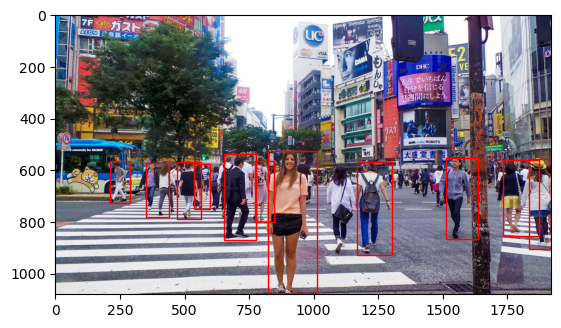

In [3]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(main_image)

bounding_boxes = []  # List to store bounding box values

# Create bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Get the label name
    label_name = model_person.config.id2label[label.item()]
    # Only process the bounding boxes for 'person'
    if label_name == 'person':
        box = [round(i, 2) for i in box.tolist()]
        print(
            f"Detected {label_name} with confidence "
            f"{round(score.item(), 3)} at location {box}"
        )
        # Store bounding box values in the list
        bounding_boxes.append(box)

        # Set default color for bounding box and count label
        bbox_color = 'red'

        # Create a Rectangle patch with the modified color
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3] -
                                 box[1], linewidth=1, edgecolor=bbox_color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

# Display the updated figure
plt.show()

In [4]:
filename = os.path.splitext(os.path.basename(image_path))[0]
# Crop and save the bounding boxes as separate images
for i, box in enumerate(bounding_boxes):
    # Convert box values to integers
    box = [int(coord) for coord in box]
    
    # Crop the image using the bounding box coordinates
    cropped_image = main_image.crop(box)
    
    # Save the cropped image with a unique filename
    cropped_image.save(f"data/cropped_images/{filename}_{i}.jpg")

<h2 style="color:#0d2599; font-size:26px;">Semantic Segmentation</h2>

In this case, I have applied semantic segmentation to identify specific objects segmented from the person. I then utilized masking to isolate these objects within the image.






/home/msds2023/fcamarao/.local/lib/python3.10/site-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/home/msds2023/fcamarao/.local/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


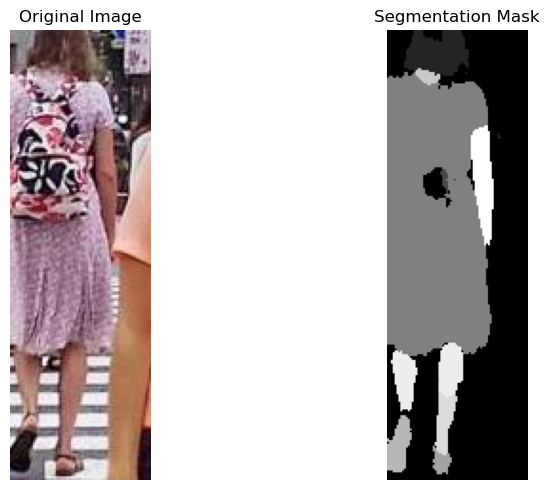

Average confidence for Background: 0.931
Average confidence for Hair: 0.750
Average confidence for Sunglasses: 0.487
Average confidence for Upper-clothes: 0.426
Average confidence for Dress: 0.880
Average confidence for Left-shoe: 0.625
Average confidence for Right-shoe: 0.733
Average confidence for Face: 0.548
Average confidence for Left-leg: 0.713
Average confidence for Right-leg: 0.702
Average confidence for Left-arm: 0.858


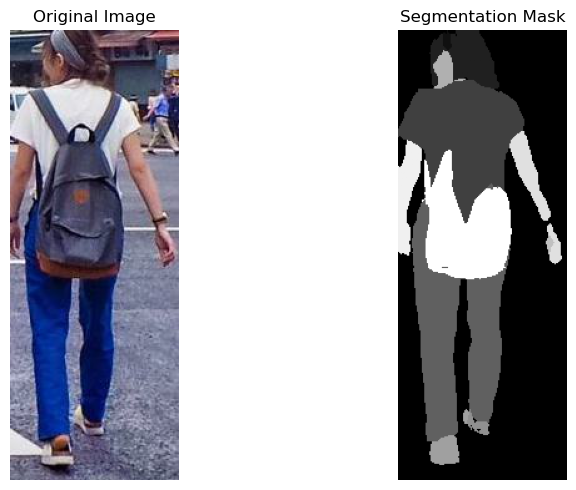

Average confidence for Background: 0.966
Average confidence for Hat: 0.496
Average confidence for Hair: 0.810
Average confidence for Upper-clothes: 0.883
Average confidence for Pants: 0.958
Average confidence for Left-shoe: 0.565
Average confidence for Right-shoe: 0.595
Average confidence for Face: 0.789
Average confidence for Left-leg: 0.438
Average confidence for Left-arm: 0.796
Average confidence for Right-arm: 0.818
Average confidence for Bag: 0.840


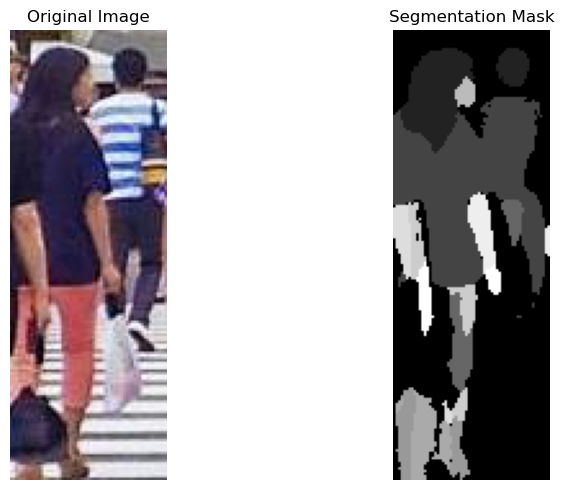

Average confidence for Background: 0.845
Average confidence for Hat: 0.356
Average confidence for Hair: 0.800
Average confidence for Upper-clothes: 0.809
Average confidence for Pants: 0.500
Average confidence for Left-shoe: 0.522
Average confidence for Right-shoe: 0.570
Average confidence for Face: 0.663
Average confidence for Left-leg: 0.549
Average confidence for Right-leg: 0.612
Average confidence for Left-arm: 0.766
Average confidence for Right-arm: 0.672


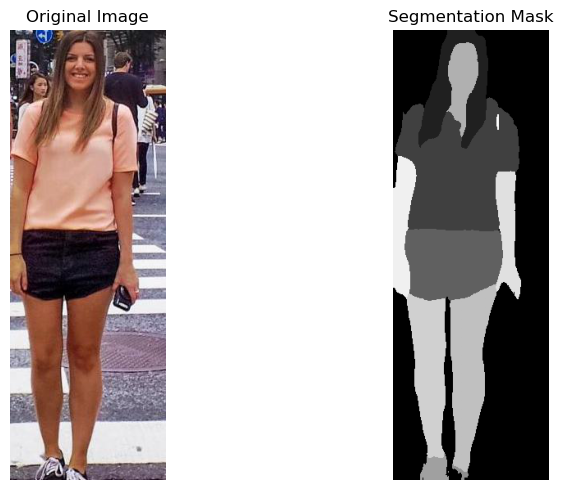

Average confidence for Background: 0.981
Average confidence for Hair: 0.878
Average confidence for Upper-clothes: 0.949
Average confidence for Pants: 0.972
Average confidence for Left-shoe: 0.649
Average confidence for Right-shoe: 0.837
Average confidence for Face: 0.916
Average confidence for Left-leg: 0.974
Average confidence for Right-leg: 0.974
Average confidence for Left-arm: 0.907
Average confidence for Right-arm: 0.910
Average confidence for Bag: 0.579


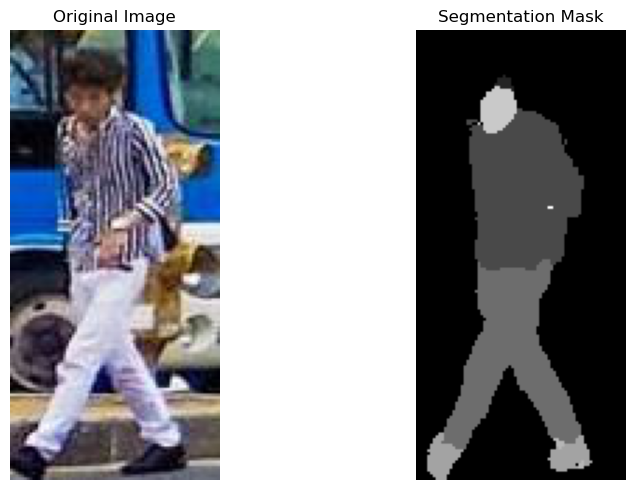

Average confidence for Background: 0.970
Average confidence for Hair: 0.553
Average confidence for Upper-clothes: 0.897
Average confidence for Pants: 0.942
Average confidence for Left-shoe: 0.559
Average confidence for Right-shoe: 0.385
Average confidence for Face: 0.741
Average confidence for Left-arm: 0.467


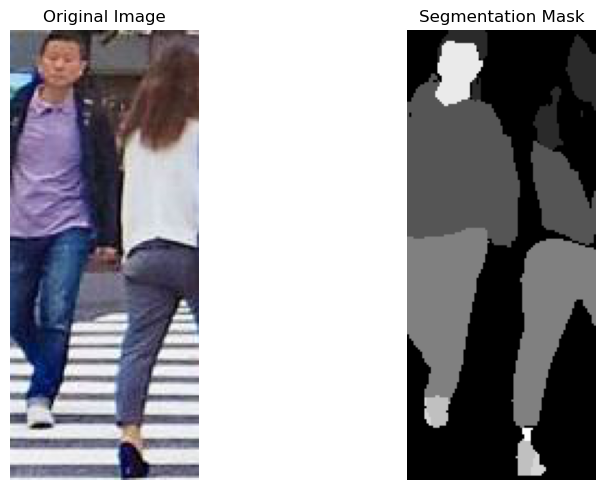

Average confidence for Background: 0.914
Average confidence for Hair: 0.693
Average confidence for Upper-clothes: 0.886
Average confidence for Pants: 0.952
Average confidence for Left-shoe: 0.621
Average confidence for Right-shoe: 0.466
Average confidence for Face: 0.902
Average confidence for Left-leg: 0.367


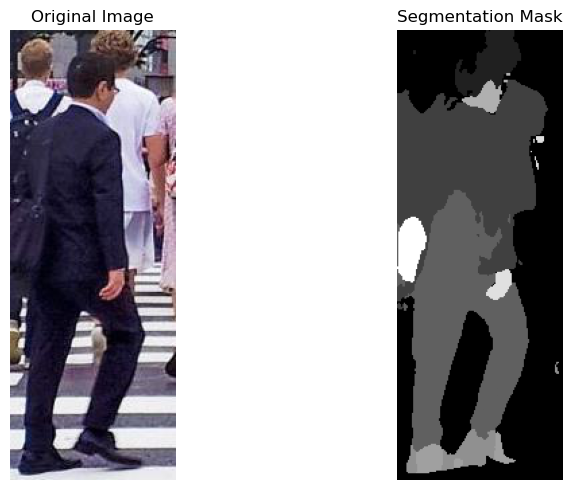

Average confidence for Background: 0.926
Average confidence for Hair: 0.740
Average confidence for Upper-clothes: 0.860
Average confidence for Pants: 0.857
Average confidence for Left-shoe: 0.625
Average confidence for Right-shoe: 0.615
Average confidence for Face: 0.816
Average confidence for Left-arm: 0.769
Average confidence for Bag: 0.526


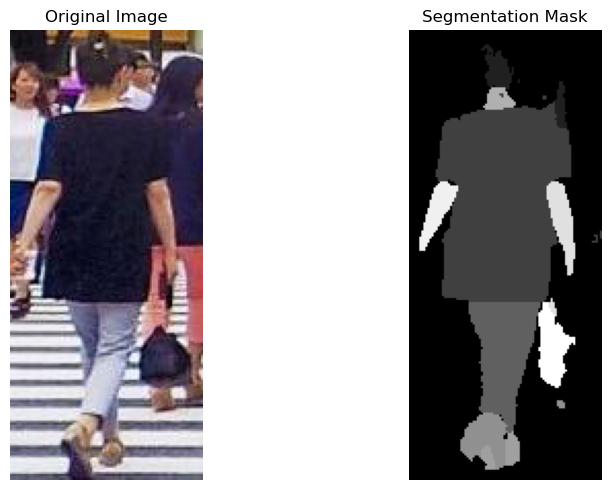

Average confidence for Background: 0.914
Average confidence for Hair: 0.601
Average confidence for Upper-clothes: 0.941
Average confidence for Pants: 0.903
Average confidence for Left-shoe: 0.574
Average confidence for Right-shoe: 0.610
Average confidence for Face: 0.577
Average confidence for Left-arm: 0.781
Average confidence for Right-arm: 0.720
Average confidence for Bag: 0.716


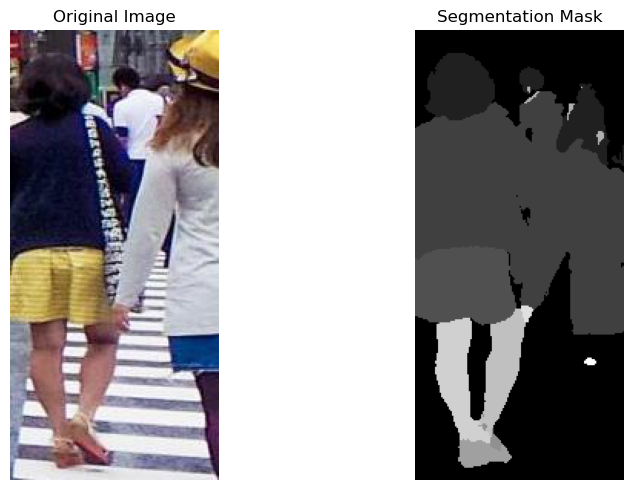

Average confidence for Background: 0.928
Average confidence for Hair: 0.791
Average confidence for Upper-clothes: 0.910
Average confidence for Skirt: 0.963
Average confidence for Left-shoe: 0.390
Average confidence for Right-shoe: 0.553
Average confidence for Face: 0.495
Average confidence for Left-leg: 0.866
Average confidence for Right-leg: 0.883
Average confidence for Left-arm: 0.471
Average confidence for Bag: 0.564


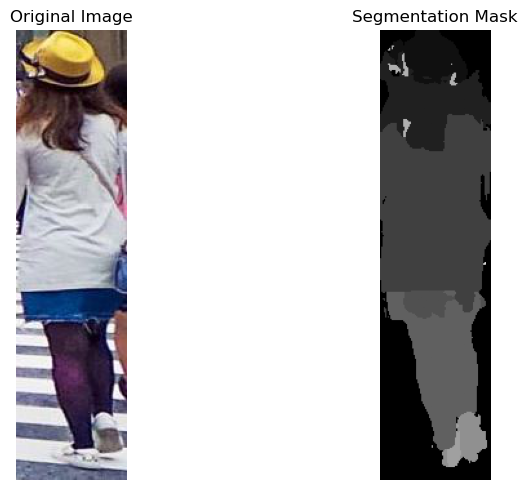

Average confidence for Background: 0.866
Average confidence for Hat: 0.832
Average confidence for Hair: 0.817
Average confidence for Upper-clothes: 0.941
Average confidence for Skirt: 0.599
Average confidence for Pants: 0.894
Average confidence for Left-shoe: 0.578
Average confidence for Right-shoe: 0.532
Average confidence for Face: 0.529
Average confidence for Bag: 0.365


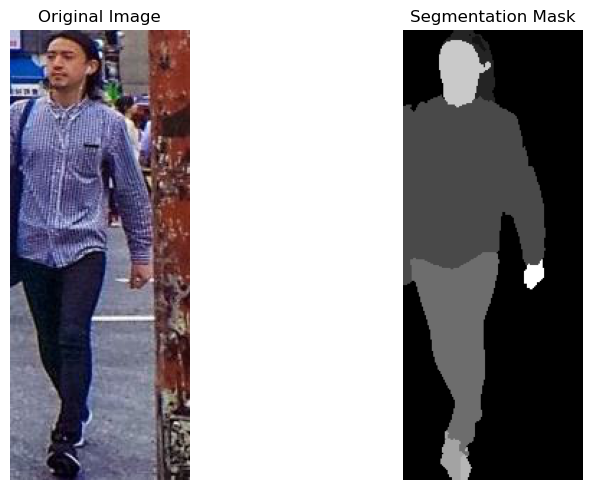

Average confidence for Background: 0.985
Average confidence for Hat: 0.575
Average confidence for Hair: 0.713
Average confidence for Upper-clothes: 0.958
Average confidence for Pants: 0.964
Average confidence for Left-shoe: 0.655
Average confidence for Right-shoe: 0.506
Average confidence for Face: 0.912
Average confidence for Left-arm: 0.666


In [5]:
# Load the feature extractor and segmentation model
extractor = AutoFeatureExtractor.from_pretrained(
    "mattmdjaga/segformer_b2_clothes")
model_segment = SegformerForSemanticSegmentation.from_pretrained(
    "mattmdjaga/segformer_b2_clothes")

# Map of class indices to labels
id2label = {
    0: "Background",
    1: "Hat",
    2: "Hair",
    3: "Sunglasses",
    4: "Upper-clothes",
    5: "Skirt",
    6: "Pants",
    7: "Dress",
    8: "Belt",
    9: "Left-shoe",
    10: "Right-shoe",
    11: "Face",
    12: "Left-leg",
    13: "Right-leg",
    14: "Left-arm",
    15: "Right-arm",
    16: "Bag",
    17: "Scarf",
}

# Define the directory path containing the images
image_path_2 = "data/cropped_images"

# Specify the prefix
prefix = filename + "_"

# Get the list of image files in the directory
image_files = [file for file in os.listdir(image_path_2) if file.startswith(prefix)]

# Iterate over each image file in the directory
for file_name in image_files:
    file_path = os.path.join(image_path_2, file_name)  # Get the full file path
    image = Image.open(file_path)  # Load the image

    # Process the image
    inputs = extractor(images=image, return_tensors="pt")

    outputs = model_segment(**inputs)
    logits = outputs.logits.cpu()

    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )

    pred_seg = upsampled_logits.argmax(dim=1)[0]

    # Display the image and the predicted segmentation mask
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Display the predicted segmentation mask
    axes[1].imshow(pred_seg, cmap="gray")
    axes[1].set_title("Segmentation Mask")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

    # Convert to numpy array
    pred_seg_np = pred_seg.detach().numpy()

    # Count unique class indices
    unique, counts = np.unique(pred_seg_np, return_counts=True)

    upsampled_logits = nn.functional.interpolate(
        logits,
        size=(128, 128),  # Set the size directly
        mode="bilinear",
        align_corners=False,
    )

    # Compute softmax probabilities
    softmax_logits = torch.nn.functional.softmax(upsampled_logits, dim=1)

    # Get the probabilities of the predicted classes
    probabilities = softmax_logits.max(dim=1).values.squeeze()

    # Convert to numpy array
    probabilities_np = probabilities.detach().numpy()

    # Get the segmentation prediction
    pred_seg = upsampled_logits.argmax(dim=1)

    # Convert to numpy array
    pred_seg_np = pred_seg.squeeze().detach().numpy()

    # Print average probability (confidence) for each class
    for u in np.unique(pred_seg_np):
        average_probability = probabilities_np[pred_seg_np == u].mean()
        print(
            f"Average confidence for {id2label[u]}: {average_probability:.3f}")

<h2 style="color:#0d2599; font-size:26px;">Color Image Segmentation</h2>

For this section, I have applied color image segmentation to filter the colors of the selected objects and perform further classification on them.

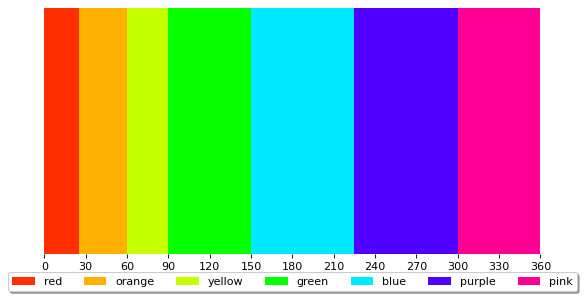

In [28]:
color_thresholds = {
    'red': (np.array([0, 50, 50]), np.array([25, 255, 255])),
    'orange': (np.array([25, 50, 50]), np.array([60, 255, 255])),
    'yellow': (np.array([60, 50, 50]), np.array([90, 255, 255])),
    'green': (np.array([90, 50, 50]), np.array([150, 255, 255])),
    'blue': (np.array([150, 50, 50]), np.array([225, 255, 255])),
    'purple': (np.array([225, 50, 50]), np.array([300, 255, 255])),
    'pink': (np.array([300, 50, 50]), np.array([360, 255, 255])),
}

import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(8, 4),
                        dpi=80, facecolor='w', edgecolor='k')

# we will normalize our threshold data to match to colormap
norm = plt.Normalize(vmin=0, vmax=360)

# Using a sample colormap for display
cmap = plt.get_cmap('hsv')

for sp in ax.spines.values():
    sp.set_visible(False)

for idx, (color, (lower, upper)) in enumerate(color_thresholds.items()):
    ax.add_patch(patches.Rectangle((lower[0], 0), upper[0]-lower[0], 10, 
                                   facecolor=cmap(norm((lower[0]+upper[0])/2)),
                                   label=color))

plt.xlim([0, 360])
plt.ylim([0, 10])
plt.yticks([])
plt.xticks(list(range(0, 361, 30)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7)
plt.show()



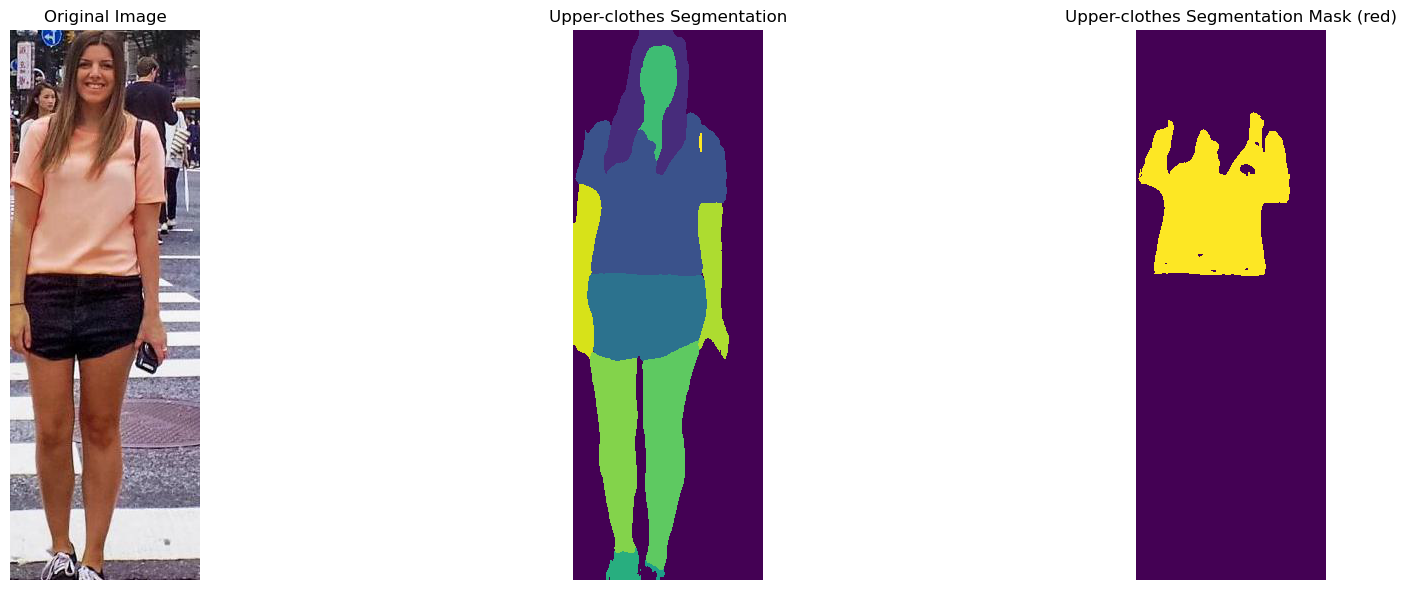

In [22]:
color_thresholds = {
    'red': (np.array([0, 50, 50]), np.array([15, 255, 255])),
    'orange': (np.array([15, 50, 50]), np.array([45, 255, 255])),
    'yellow': (np.array([25, 50, 50]), np.array([60, 255, 255])),
    'green': (np.array([60, 50, 50]), np.array([150, 255, 255])),
    'blue': (np.array([150, 50, 50]), np.array([225, 255, 255])),
    'purple': (np.array([225, 50, 50]), np.array([300, 255, 255])),
    'pink': (np.array([300, 50, 50]), np.array([360, 255, 255])),
    'black': (np.array([0, 0, 0]), np.array([180, 255, 50])),
    'white': (np.array([0, 0, 200]), np.array([180, 50, 255])),
}


# Specify the label and average probability threshold
target_label = "Upper-clothes"
probability_threshold = 0.6
required_percentage = 15  # 10%

# Specify the target color
target_color = "red"

# List to store the file names of outputted images
outputted_images = []

# Iterate over each image file in the directory
for file_name in image_files:
    file_path = os.path.join(image_path_2, file_name)  # Get the full file path
    image = Image.open(file_path)  # Load the image
    
    # Process the image
    inputs = extractor(images=image, return_tensors="pt")

    outputs = model_segment(**inputs)
    logits = outputs.logits.cpu()

    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )

    # Compute softmax probabilities
    softmax_logits = torch.nn.functional.softmax(upsampled_logits, dim=1)

    # Get the probabilities of the predicted classes
    probabilities = softmax_logits.max(dim=1).values.squeeze()

    # Convert to numpy array
    probabilities_np = probabilities.detach().cpu().numpy()

    # Get the segmentation prediction
    pred_seg = upsampled_logits.argmax(dim=1)

    # Convert to numpy array
    pred_seg_np = pred_seg.squeeze().detach().cpu().numpy()

    # Filter image based on label and average probability threshold
    label_index = list(id2label.values()).index(target_label)
    average_probability = probabilities_np[pred_seg_np == label_index].mean()
    
    if average_probability > probability_threshold:
        # Convert pred_seg_np to uint8 for imshow()
        pred_seg_np = pred_seg_np.astype(np.uint8)
        
        # Convert the original image to HSV
        image_hsv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2HSV)
        
        # Apply the color threshold to the image
        lower, upper = color_thresholds[target_color]
        mask = cv2.inRange(image_hsv, lower, upper)

        # Apply the mask to the target label region of the segmentation mask
        color_mask = np.zeros_like(pred_seg_np)
        color_mask[pred_seg_np == label_index] = mask[pred_seg_np == label_index]
        
        # Check if the color-filtered region constitutes a certain percentage of the total region of the target label
        color_mask_percentage = np.sum(color_mask) / np.sum(pred_seg_np == label_index)

        if color_mask_percentage > required_percentage:
            # Display the original image, target label, and the color filtered segmentation mask
            fig, ax = plt.subplots(1, 3, figsize=(20, 6))

            ax[0].imshow(image)
            ax[0].set_title('Original Image')
            ax[0].axis('off')

            ax[1].imshow(pred_seg_np)
            ax[1].set_title(f'{target_label} Segmentation')
            ax[1].axis('off')

            ax[2].imshow(color_mask)
            ax[2].set_title(f'{target_label} Segmentation Mask ({target_color})')
            ax[2].axis('off')

            plt.tight_layout()
            plt.show()

            outputted_images.append(file_name)  # Append the file name to the list

numeric_values = []

for image_name in outputted_images:
    numeric_value = image_name.split("_")[1].split(".")[0]
    numeric_values.append(int(numeric_value))


<h2 style="color:#0d2599; font-size:26px;">Object (Person) Classification</h2>

Finally, using the results from the previous steps, I am able to successfully classify the person based on the specified parameters, such as the target label for object filtering, color filtering, and threshold. As a final step, I apply bounding boxes to the original photo to highlight the classified person.

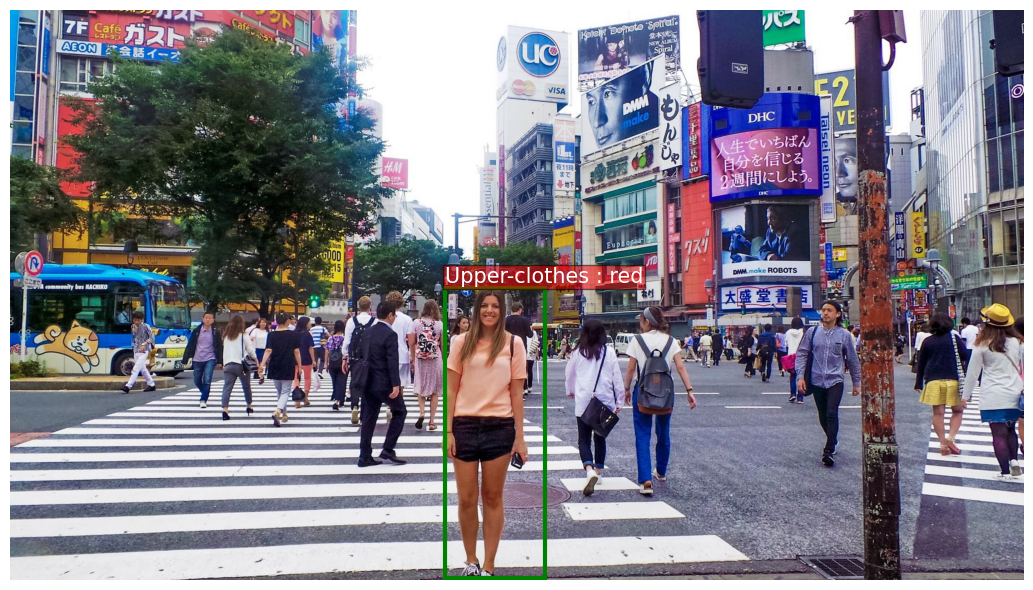

In [30]:
# Create figure and axes with full width
fig, ax = plt.subplots(figsize=(12, 6))

# Display the image
ax.imshow(main_image)

for i, box in enumerate(bounding_boxes):
    if i in numeric_values:
        # Convert box values to integers
        box = [int(coord) for coord in box]

        # Calculate label position
        label_x = box[0]
        label_y = box[1] - 10
        if label_y < 0:
            label_y = 0

        # Add a text label to the box with background color and transparency
        label_text = f"{target_label} : {target_color}"
        bbox_props = dict(boxstyle='square,pad=0.1',
                          facecolor='red', alpha=0.5)
        plt.text(label_x, label_y, label_text,
                 color='white', fontsize=15, bbox=bbox_props)

        specific_bbox_color = 'green'
        specific_rect = patches.Rectangle(
            (box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor=specific_bbox_color, facecolor='none')
        ax.add_patch(specific_rect)

# Display the updated figure
# Remove axis
ax.axis('off')
plt.tight_layout()
plt.show()


---
<a id='Results'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">CONCLUSION</h1>

The ability to accurately detect and identify individuals based on their clothing and color information has enormous business value. For example, in scenarios where there is a need to locate a missing person or identify a suspect in a public safety incident, this technology can provide critical information to aid in the investigation.

Beyond this, the technology also has the potential to enhance public safety proactively. For instance, patterns in clothing colors and types could be analyzed over time to anticipate potential crowd-related issues or to enhance urban planning strategies.

The use of transformers for object detection and semantic segmentation is a powerful tool for enhancing the capabilities of Smart City technologies. By leveraging these advanced techniques, we can achieve a more detailed understanding of our urban environment and make strides in improving public safety and city planning.

As research in this area continues, we can expect to see even more innovative applications and improvements in accuracy, making our cities smarter and safer places to live.

---
<a id='Results'></a>
<h1 style="color:#0d2599; background-color:#e0eaf8; border: 1px solid #ffffff; padding: 10px 0;">REFERENCES</h1>

Hugging Face. (n.d.). YolosForObjectDetection. Retrieved from [URL: https://huggingface.co/hustvl/yolos-tiny]

Hugging Face. (n.d.). SegformerForSemanticSegmentation. Retrieved from [URL: https://huggingface.co/mattmdjaga/segformer_b2_clothes]

OpenAI. (n.d.). Conversations. Retrieved from [URL: https://chat.openai.com/]

Shibuya Crossing. Retrieved from [URL: https://4.bp.blogspot.com/-eImJW3p_YTM/Wg5OKtBi87I/AAAAAAAAUrg/WNTANuRanSofJAbBIqh71bY4uGQ8VY0jgCLcBGAs/s1600/IMG_9271.jpg] 